## **AIVLE School 미니프로젝트 5기 AI트랙 2차** ##
## **공공데이터를 활용한 <span style="color:skyblue">미세먼지 농도</span> 예측**
---

## [step 3] 모델링

## **0.프로젝트 소개**

### (1) 수행 목표
- 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요.

#### 우리가 풀어야 하는 문제는 무엇인가요? 
* 서울 지역의 미세먼지 데이터와 날씨 데이터를 활용하여,
미세먼지 예측에 관련 있는 데이터 항목으로 데이터를 구성, 전처리 하여 
미세먼지 농도를 예측하는 머신러닝 모델 구현


### (2) 데이터 소개

#### 1) 기본 데이터

* 학습 데이터
    * air_2022.csv : 2022년 미세먼지 데이터
    * weather_2022.csv : 2022년 날씨 데이터
* 테스트 데이터
    * air_2023.csv : 2023년 미세먼지 데이터
    * weather_2023.csv : 2023년 날씨 데이터

#### 2) 데이터셋의 변수 소개(weather_2022,2023)

* 증기압: 증기가 고체 또는 액체와 동적 평형 상태에 있을 때 증기의 압력 (증기가 되려는 힘)
* 이슬점 온도: 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도
* 일조: 일정한 물체나 땅의 겉면에 태양 광선이 비치는 시간 (1시간 중 비율)
* 일사(량): 태양으로부터 오는 태양 복사 에너지가 지표에 닿는 양 (면적당 에너지 량)
* 전운량: 하늘을 육안으로 관측하여 전부 구름일 때 10, 구름이 덮고 있는 하늘의 비율에 따라 0~10
* 중하층운량: 중층과 하층에 있는 구름의 분포량(중하층 구름이 날씨에 영향 주므로 따로 표기)
* 운형(운형약어): 구름의 종류. 약어 코드로 기재됨
* 최저운고: 가장 낮은 구름의 높이
* 현상번호(국내식): 비, 소낙비, 싸락눈, 눈보라 등의 기상현상을 나타낸 코드번호
* 지면온도: 지면 0cm 온도
* 지중온도: 땅 속 온도변수1

## **1.환경설정**

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글코랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
            
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정
* 로컬환경 또는 구글 코랩 중 하나를 사용하시면 됩니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
path = 'C:/Users/User/project/'

#### 2) 구글 코랩 수행

* 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 라이브러리 설치 및 로딩

In [29]:
# 필요한 라이브러리 설치 및 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.
import warnings

warnings.filterwarnings(action='ignore')

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

In [30]:
# 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### (3) 데이터 불러오기
* 주어진 데이터셋
    * 미세먼지 및 날씨 데이터 : train_x.csv / train_y.csv / test_x.csv / test_y.csv

#### 1) 데이터 로딩

In [31]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
train_x = pd.read_csv('train_x.csv')
train_y = pd.read_csv('train_y.csv')
test_x = pd.read_csv('test_x.csv')
test_y = pd.read_csv('test_y.csv')

#### 2) 기본 정보 조회
* 로딩한 데이터의 기본 정보를 확인 합니다(info 등..)

In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SO2            8760 non-null   float64
 1   CO             8760 non-null   float64
 2   NO2            8760 non-null   float64
 3   PM10           8760 non-null   float64
 4   PM25           8760 non-null   float64
 5   기온(°C)         8760 non-null   float64
 6   강수량(mm)        8760 non-null   float64
 7   풍향(16방위)       8760 non-null   int64  
 8   습도(%)          8760 non-null   int64  
 9   증기압(hPa)       8760 non-null   float64
 10  이슬점온도(°C)      8760 non-null   float64
 11  현지기압(hPa)      8760 non-null   float64
 12  해면기압(hPa)      8760 non-null   float64
 13  전운량(10분위)      8760 non-null   int64  
 14  중하층운량(10분위)    8760 non-null   int64  
 15  운형(운형약어)       8760 non-null   int64  
 16  시정(10m)        8760 non-null   int64  
 17  지면온도(°C)       8760 non-null   float64
 18  5cm 지중온도

## **2.머신러닝 모델링**

### (1) 모델링: LinearRegression

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

### (2) 모델링: 랜덤포레스트

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

### (3) 모델링: GradientBoosting

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

### (4) 모델링: Self Choice Model 

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

#### XGBRegressor, LGBMRegressor 사용

### 함수 생성

In [33]:
def modeling(models, train_x, train_y, test_x, test_y):
    result = {}
    for model_name, model in models.items():
        model.fit(train_x, train_y)
        y_pred = model.predict(test_x)
        
        print('=' * 40)
        print(model_name)
        print('MSE : ', mse(test_y, y_pred))
        print('R2 : ', r2_score(test_y, y_pred))
        print('=' * 40)
        
        result[model_name] = r2_score(test_y, y_pred)
        joblib.dump(model, f'{model_name}.pkl')
        
    return result

In [35]:
models = {
  'Linear Regression' : LinearRegression(),
  'Random Forest' : RFR(random_state = 1), 
  'Gradient Boost' : GBR( random_state = 1), 
  'XGBoost' : XGBRegressor( random_state = 1),
  'LightGBM' : LGBMRegressor(random_state = 1, verbose = -1)
}

result = modeling(models, train_x, train_y, test_x, test_y)

Linear Regression
MSE :  45.77312769585848
R2 :  0.9591433433897891
Random Forest
MSE :  64.84288446502057
R2 :  0.9421218606295364
Gradient Boost
MSE :  74.69695170716122
R2 :  0.9333262143236691
XGBoost
MSE :  91.08406432441316
R2 :  0.9186992341119478
LightGBM
MSE :  65.9625041204482
R2 :  0.9411224988183926


In [36]:
def feature_importance_plot(model):
    plt.barh(y = list(train_x), width = model.feature_importances_)
    plt.show()
    
def r2score_plot(result):
    plt.barh(y = list(result), width = result.values())
    plt.show()

#### feature_importance

##### Random Forest

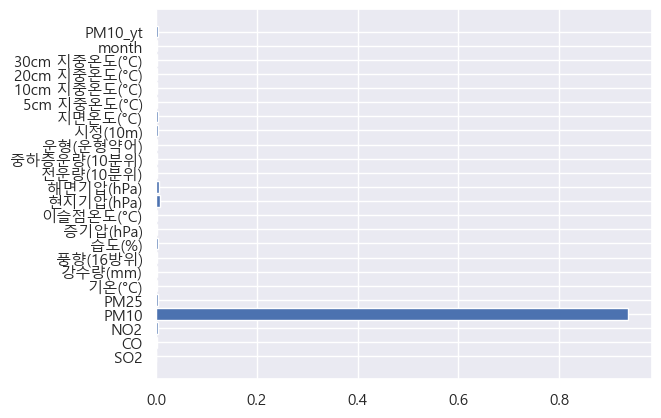

In [37]:
feature_importance_plot(models['Random Forest'])

- PM10 의 중요도가 가장 크다
- 나머지 변수들의 중요도는 의미가 없다
    - 기압 약간...

##### Gradient Boost

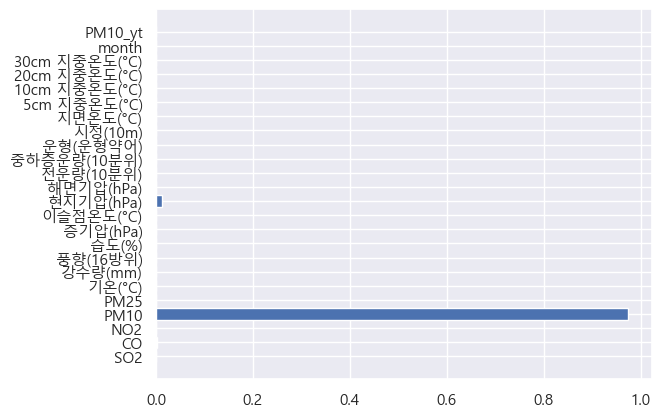

In [38]:
feature_importance_plot(models['Gradient Boost'])

##### XGBoost

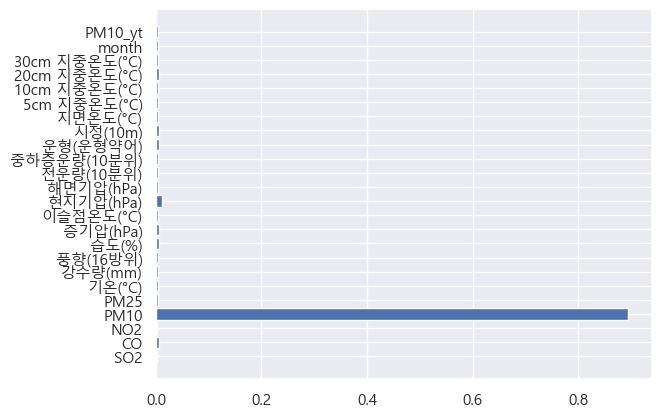

In [39]:
feature_importance_plot(models['XGBoost'])

##### LightGBM

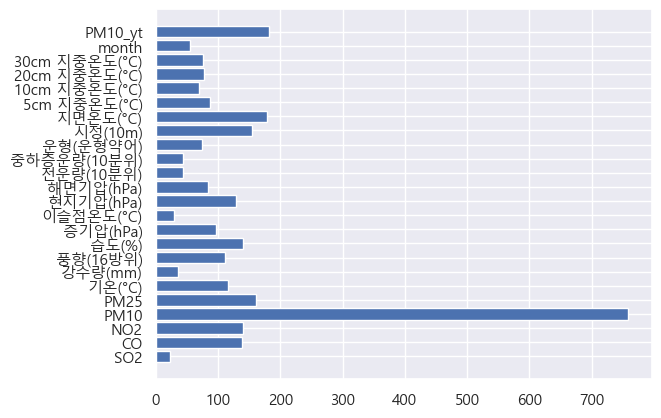

In [40]:
feature_importance_plot(models['LightGBM'])

#### r2 score 비교

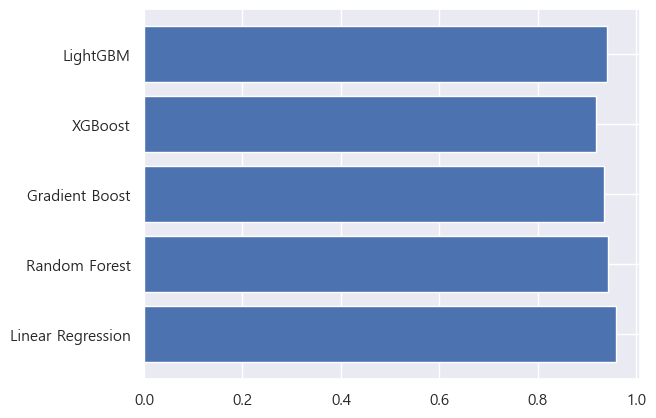

In [41]:
r2score_plot(result)

# 고생하셨습니다👍👍 